In [36]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [38]:
dataset="dataset_electiva3.csv"
data=pd.read_csv(dataset)
data.head()

,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2011,5,Antioquia,1288473,94.01,93.85,70.28,94.12,75.68,44.37,...,2.06,0.07,94.56,2.54,2.96,4.25,0.07,4.56,5.27,1.68
1,2011,8,Atlántico,523935,99.32,99.05,50.59,98.93,80.22,50.17,...,0.54,0.12,96.49,0.67,0.75,1.82,0.12,1.77,2.18,0.88
2,2011,11,"Bogotá, D.C.",1479334,90.70,90.29,68.63,86.99,84.70,55.01,...,0.00,0.00,94.69,0.00,0.00,3.23,0.00,2.30,5.11,2.57
3,2011,13,Bolívar,496676,91.57,91.40,59.74,90.81,67.34,39.17,...,2.10,0.46,95.48,2.75,3.67,4.43,0.46,4.44,5.37,2.28
4,2011,15,Boyacá,300501,86.16,86.11,63.36,82.50,74.65,49.09,...,2.73,0.17,96.10,4.31,3.26,2.62,0.17,1.90,4.19,1.55


In [39]:
data.describe

<bound method NDFrame.describe of       AÑO  CÓDIGO_DEPARTAMENTO  DEPARTAMENTO  POBLACIÓN_5_16  \
0    2011                    5     Antioquia         1288473   
1    2011                    8     Atlántico          523935   
2    2011                   11  Bogotá, D.C.         1479334   
3    2011                   13       Bolívar          496676   
4    2011                   15        Boyacá          300501   
..    ...                  ...           ...             ...   
391  2022                   91      Amazonas           23239   
392  2022                   94       Guainía           16612   
393  2022                   95      Guaviare           22538   
394  2022                   97        Vaupés           15585   
395  2022                   99       Vichada           33949   

     TASA_MATRICULACIÓN_5_16  COBERTURA_NETA  COBERTURA_NETA_TRANSICIÓN  \
0                      94.01           93.85                      70.28   
1                      99.32           99.05   

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          396 non-null    int64  
 1   CÓDIGO_DEPARTAMENTO          396 non-null    int64  
 2   DEPARTAMENTO                 396 non-null    object 
 3   POBLACIÓN_5_16               396 non-null    int64  
 4   TASA_MATRICULACIÓN_5_16      396 non-null    float64
 5   COBERTURA_NETA               396 non-null    float64
 6   COBERTURA_NETA_TRANSICIÓN    396 non-null    float64
 7   COBERTURA_NETA_PRIMARIA      396 non-null    float64
 8   COBERTURA_NETA_SECUNDARIA    396 non-null    float64
 9   COBERTURA_NETA_MEDIA         396 non-null    float64
 10  COBERTURA_BRUTA              396 non-null    float64
 11  COBERTURA_BRUTA_TRANSICIÓN   396 non-null    float64
 12  COBERTURA_BRUTA_PRIMARIA     396 non-null    float64
 13  COBERTURA_BRUTA_SECU

In [41]:
# Verificar si hay valores faltantes en el conjunto de datos
print("Valores faltantes en el conjunto de datos: ", data.isnull().values.any())

# Verificar en qué columnas hay valores faltantes
print("Valores faltantes por columna: \n", data.isnull().sum())

Valores faltantes en el conjunto de datos:  True
Valores faltantes por columna: 
 AÑO                              0
CÓDIGO_DEPARTAMENTO              0
DEPARTAMENTO                     0
POBLACIÓN_5_16                   0
TASA_MATRICULACIÓN_5_16          0
COBERTURA_NETA                   0
COBERTURA_NETA_TRANSICIÓN        0
COBERTURA_NETA_PRIMARIA          0
COBERTURA_NETA_SECUNDARIA        0
COBERTURA_NETA_MEDIA             0
COBERTURA_BRUTA                  0
COBERTURA_BRUTA_TRANSICIÓN       0
COBERTURA_BRUTA_PRIMARIA         0
COBERTURA_BRUTA_SECUNDARIA       0
COBERTURA_BRUTA_MEDIA            0
TAMAÑO_PROMEDIO_DE_GRUPO       165
SEDES_CONECTADAS_A_INTERNET    165
DESERCIÓN                        0
DESERCIÓN_TRANSICIÓN             1
DESERCIÓN_PRIMARIA               0
DESERCIÓN_SECUNDARIA             0
DESERCIÓN_MEDIA                  0
APROBACIÓN                       0
APROBACIÓN_TRANSICIÓN            0
APROBACIÓN_PRIMARIA              0
APROBACIÓN_SECUNDARIA            0
APROBACI

In [42]:

data.fillna({'TAMAÑO_PROMEDIO_DE_GRUPO': 17.86}, inplace=True)
data.fillna({'SEDES_CONECTADAS_A_INTERNET': 16.63}, inplace=True)
data.fillna({'DESERCIÓN_TRANSICIÓN': 1.28}, inplace=True)


In [43]:
# Verificar si hay valores faltantes en el conjunto de datos
print("Valores faltantes en el conjunto de datos: ", data.isnull().values.any())

# Verificar en qué columnas hay valores faltantes
print("Valores faltantes por columna: \n", data.isnull().sum())

Valores faltantes en el conjunto de datos:  False
Valores faltantes por columna: 
 AÑO                            0
CÓDIGO_DEPARTAMENTO            0
DEPARTAMENTO                   0
POBLACIÓN_5_16                 0
TASA_MATRICULACIÓN_5_16        0
COBERTURA_NETA                 0
COBERTURA_NETA_TRANSICIÓN      0
COBERTURA_NETA_PRIMARIA        0
COBERTURA_NETA_SECUNDARIA      0
COBERTURA_NETA_MEDIA           0
COBERTURA_BRUTA                0
COBERTURA_BRUTA_TRANSICIÓN     0
COBERTURA_BRUTA_PRIMARIA       0
COBERTURA_BRUTA_SECUNDARIA     0
COBERTURA_BRUTA_MEDIA          0
TAMAÑO_PROMEDIO_DE_GRUPO       0
SEDES_CONECTADAS_A_INTERNET    0
DESERCIÓN                      0
DESERCIÓN_TRANSICIÓN           0
DESERCIÓN_PRIMARIA             0
DESERCIÓN_SECUNDARIA           0
DESERCIÓN_MEDIA                0
APROBACIÓN                     0
APROBACIÓN_TRANSICIÓN          0
APROBACIÓN_PRIMARIA            0
APROBACIÓN_SECUNDARIA          0
APROBACIÓN_MEDIA               0
REPROBACIÓN               

In [44]:
data.describe()

,AÑO,CÓDIGO_DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
count,396.000000,396.000000,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,...,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,2016.500000,52.151515,3.024727e+05,85.374141,85.760985,56.927727,84.086843,67.945152,37.804116,98.331818,...,5.623157,0.955379,91.754419,7.791061,5.112273,3.378308,0.955379,3.186894,4.511995,1.920505
std,3.456419,30.829663,3.138346e+05,10.501529,10.584387,11.676792,10.083619,15.491727,12.476358,11.478234,...,3.776896,1.691920,4.812358,4.837679,3.004444,2.560716,1.691920,2.752398,3.307020,1.617196
min,2011.000000,5.000000,1.079600e+04,52.330000,50.790000,19.220000,51.120000,24.060000,6.790000,59.790000,...,0.000000,0.000000,70.720000,0.000000,0.000000,0.100000,0.000000,0.060000,0.110000,0.000000
25%,2013.750000,20.000000,8.785650e+04,79.807500,80.560000,50.495000,78.492500,60.350000,30.002500,93.590000,...,2.737500,0.177500,90.347500,3.897500,2.947500,1.367500,0.177500,1.227500,1.940000,0.800000
50%,2016.500000,52.000000,2.362655e+05,86.870000,87.855000,58.365000,85.980000,72.560000,40.540000,100.455000,...,5.755000,0.440000,92.430000,8.260000,5.175000,2.520000,0.440000,2.260000,3.455000,1.435000
75%,2019.250000,81.000000,3.892458e+05,93.520000,93.560000,65.892500,91.515000,78.347500,47.075000,105.952500,...,7.582500,0.940000,94.842500,11.167500,6.695000,4.752500,0.940000,4.392500,6.360000,2.792500
max,2022.000000,99.000000,1.479334e+06,103.940000,103.880000,82.950000,102.100000,91.090000,62.050000,123.040000,...,19.320000,13.130000,99.060000,24.570000,17.910000,14.760000,13.130000,18.980000,25.220000,16.390000


In [45]:
import seaborn as sns

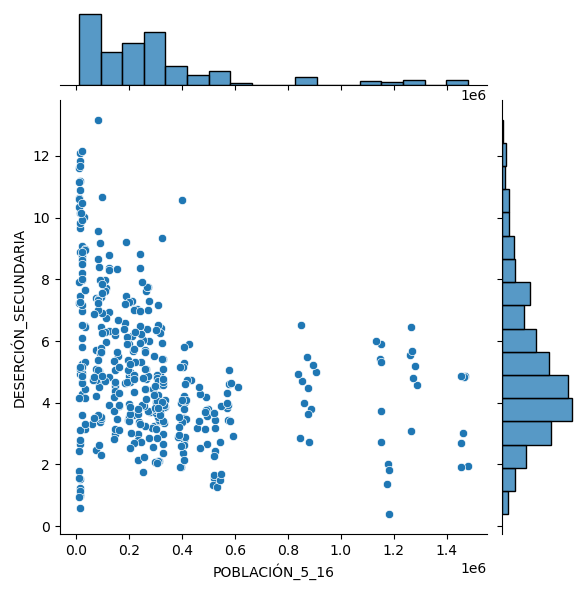

In [46]:
sns.jointplot(x=data['POBLACIÓN_5_16'],y=data['DESERCIÓN_SECUNDARIA'])

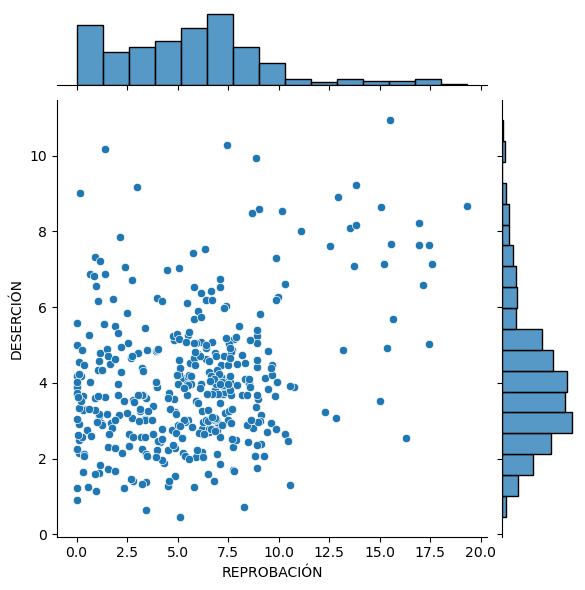

In [47]:
sns.jointplot(x=data['REPROBACIÓN'],y=data['DESERCIÓN'])

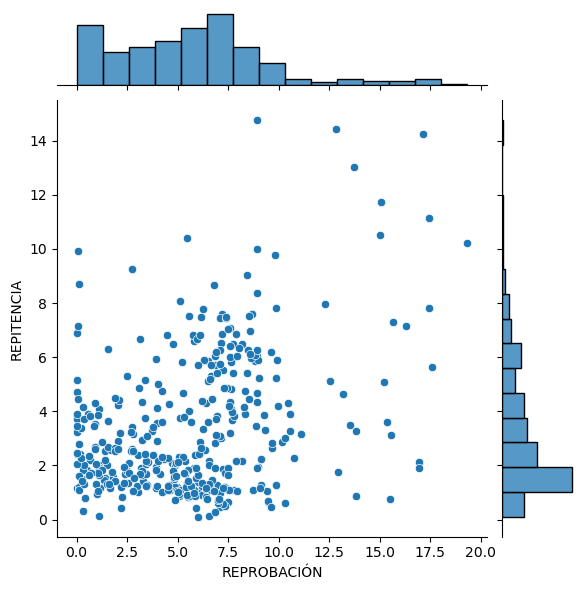

In [48]:
sns.jointplot(x=data['REPROBACIÓN'],y =data['REPITENCIA'])

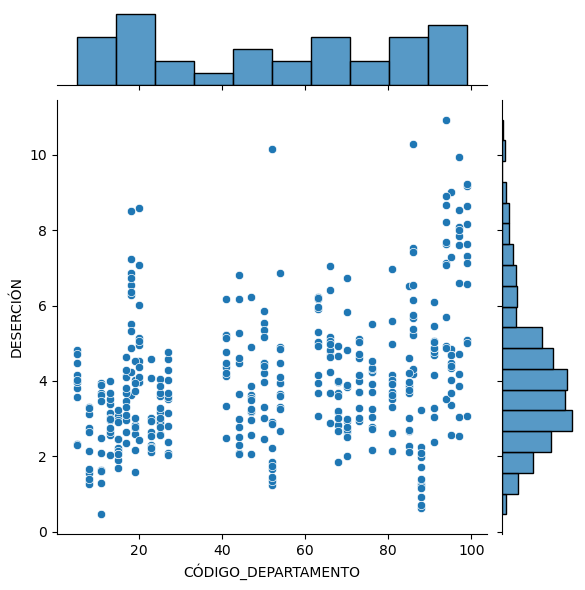

In [49]:
sns.jointplot(x=data['CÓDIGO_DEPARTAMENTO'],y=data['DESERCIÓN'])

In [ ]:
sns.pairplot(data)

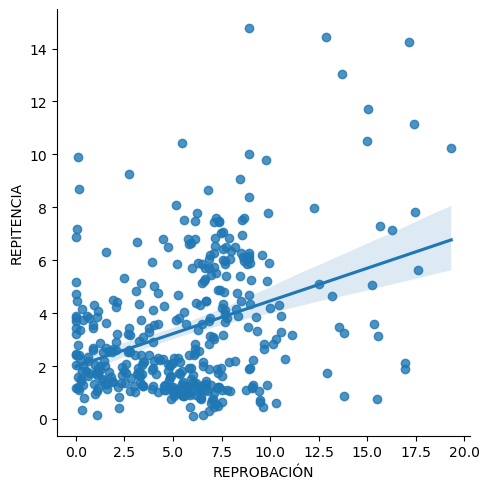

In [50]:
sns.lmplot(x='REPROBACIÓN',y ='REPITENCIA', data=data)

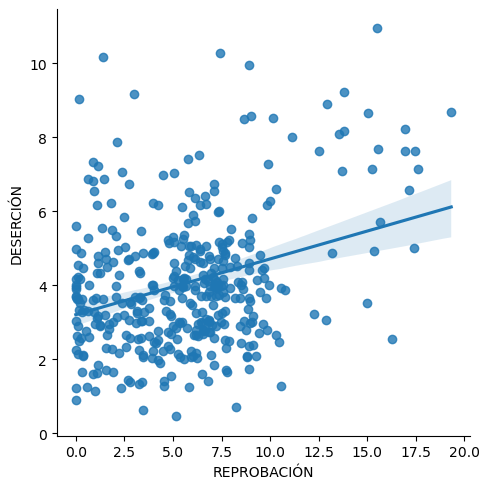

In [51]:
sns.lmplot(x='REPROBACIÓN',y ='DESERCIÓN', data=data)

In [52]:
y = data['DESERCIÓN']

In [53]:
X = data[['REPROBACIÓN','REPITENCIA']]

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lm = LinearRegression()

In [58]:
lm.fit(X_train,y_train)

LinearRegression()

In [59]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.17462223 -0.03679872]


In [60]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

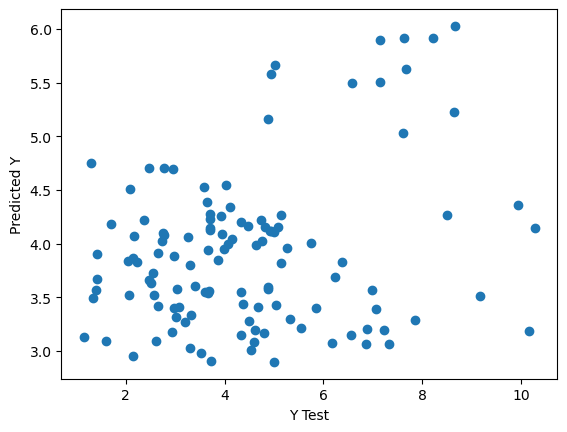

In [61]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.5515023495805567
MSE: 4.266949808438891
RMSE: 2.0656596545507906


C:\Users\juanm\AppData\Local\Temp\ipykernel_6624\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


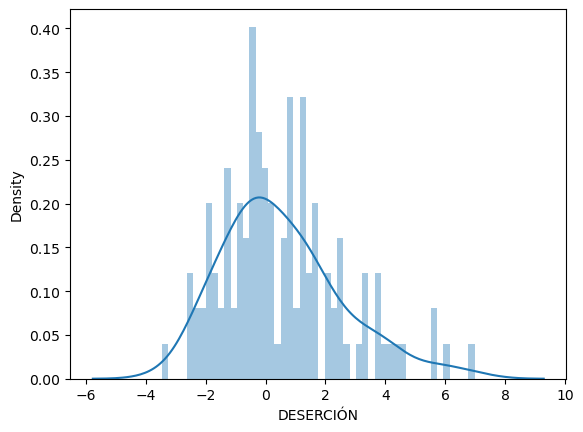

In [63]:
sns.distplot((y_test-predictions),bins=50);